## Lab 7.Loan Approval Classification using SVM

### B.Sowmiya-38

## Step 1.Understand Data

In [1]:
import pandas as pd
file=pd.read_csv("train_loan.csv")

In [2]:
file.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
file.shape

(614, 13)

In [4]:
file.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
file.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
file.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

## Step2 :Data cleaning

In [8]:
file['Dependents'] = file['Dependents'].replace(to_replace='0', value='true')
file['Dependents'] = file['Dependents'].replace(to_replace='1', value='false')
file['Dependents'] = file['Dependents'].replace(to_replace='2', value='n')
file['Dependents'] = file['Dependents'].replace(to_replace='3+', value='na')
print(file)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No       true      Graduate            No   
1    LP001003    Male     Yes      false      Graduate            No   
2    LP001005    Male     Yes       true      Graduate           Yes   
3    LP001006    Male     Yes       true  Not Graduate            No   
4    LP001008    Male      No       true      Graduate            No   
5    LP001011    Male     Yes          n      Graduate           Yes   
6    LP001013    Male     Yes       true  Not Graduate            No   
7    LP001014    Male     Yes         na      Graduate            No   
8    LP001018    Male     Yes          n      Graduate            No   
9    LP001020    Male     Yes      false      Graduate            No   
10   LP001024    Male     Yes          n      Graduate            No   
11   LP001027    Male     Yes          n      Graduate           NaN   
12   LP001028    Male     Yes          n      Graduate          

In [9]:
missing_values = file.isna()
print(missing_values)


     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
5      False   False    False       False      False          False   
6      False   False    False       False      False          False   
7      False   False    False       False      False          False   
8      False   False    False       False      False          False   
9      False   False    False       False      False          False   
10     False   False    False       False      False          False   
11     False   False    False       False      False           True   
12     False   False    False       False      False          False   
13    

In [10]:
file[['Gender','Married','Dependents','Education','Self_Employed','Credit_History']].fillna( method ='ffill', inplace=True)
file

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,true,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,n,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,true,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,na,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,n,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,false,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [11]:
dp=file.drop(['Loan_ID'],axis=1)
dp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,true,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,n,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,true,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,na,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,n,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,false,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [12]:
df = file.fillna(file.mean())
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,true,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,Male,Yes,n,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,Male,Yes,true,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,Male,Yes,na,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,Male,Yes,n,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,false,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [13]:
# replace all NaN values with the value 0
df = file.fillna(0)

In [14]:
# fill NaN values with the previous non-NaN value
df = file.fillna(method='ffill')

# fill NaN values with the next non-NaN value
df = file.fillna(method='bfill')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,true,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,n,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,true,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,na,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,n,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,false,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Step 3.Exploratory Data Analysis

## count plot

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Married', hue='Loan_Status', data=file)

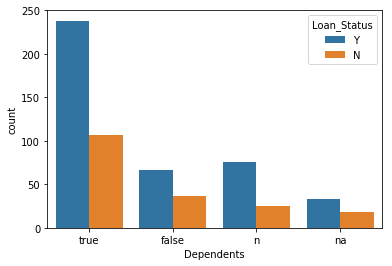

In [16]:
sns.countplot(x='Dependents', hue='Loan_Status', data=file)

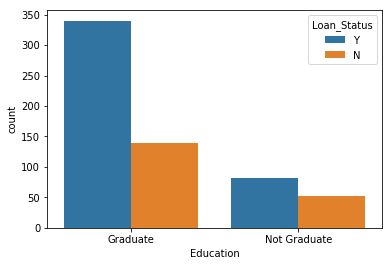

In [17]:
sns.countplot(x='Education', hue='Loan_Status', data=file)

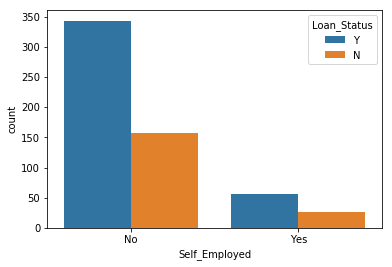

In [18]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=file)

## Step 4. Extract X and Y

In [19]:
X=df[["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]]
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,true,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,LP001011,Male,Yes,n,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
6,LP001013,Male,Yes,true,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
7,LP001014,Male,Yes,na,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,LP001018,Male,Yes,n,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,LP001020,Male,Yes,false,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban


In [20]:
y=df["Loan_Status"].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

## Step 5: One Hot Encoding

In [21]:
X=pd.get_dummies(X)
df = pd.concat([df, X], axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_n,Dependents_na,Dependents_true,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,true,Graduate,No,5849,0.0,128.0,360.0,...,0,0,1,1,0,1,0,0,0,1
1,LP001003,Male,Yes,false,Graduate,No,4583,1508.0,128.0,360.0,...,0,0,0,1,0,1,0,1,0,0
2,LP001005,Male,Yes,true,Graduate,Yes,3000,0.0,66.0,360.0,...,0,0,1,1,0,0,1,0,0,1
3,LP001006,Male,Yes,true,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,0,1,0,1,1,0,0,0,1
4,LP001008,Male,No,true,Graduate,No,6000,0.0,141.0,360.0,...,0,0,1,1,0,1,0,0,0,1
5,LP001011,Male,Yes,n,Graduate,Yes,5417,4196.0,267.0,360.0,...,1,0,0,1,0,0,1,0,0,1
6,LP001013,Male,Yes,true,Not Graduate,No,2333,1516.0,95.0,360.0,...,0,0,1,0,1,1,0,0,0,1
7,LP001014,Male,Yes,na,Graduate,No,3036,2504.0,158.0,360.0,...,0,1,0,1,0,1,0,0,1,0
8,LP001018,Male,Yes,n,Graduate,No,4006,1526.0,168.0,360.0,...,1,0,0,1,0,1,0,0,0,1
9,LP001020,Male,Yes,false,Graduate,No,12841,10968.0,349.0,360.0,...,0,0,0,1,0,1,0,0,1,0


## Step 6.Model Building

### Split X and y

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### fit_transform

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### create Linear SVC model

In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC()

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

### accuracy

In [25]:
# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5284552845528455


### confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)


[[22 21]
 [37 43]]


### Classification_report

In [27]:
from sklearn.metrics import classification_report
# print the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          N       0.37      0.51      0.43        43
          Y       0.67      0.54      0.60        80

avg / total       0.57      0.53      0.54       123



## Step 7.Performance comparison

### Linear SVC against Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
# create a logistic regression model with default hyperparameters
lr_model = LogisticRegression()

# train the logistic regression model on the training data
lr_model.fit(X_train, y_train)

# make predictions on the test data using the logistic regression model
lr_y_pred = lr_model.predict(X_test)

# calculate the accuracy of the logistic regression model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print('Logistic regression accuracy:', lr_accuracy)

# print the classification report for the logistic regression model
print('Logistic regression classification report:')
print(classification_report(y_test, lr_y_pred))

Logistic regression accuracy: 0.7967479674796748
Logistic regression classification report:
             precision    recall  f1-score   support

          N       0.95      0.44      0.60        43
          Y       0.77      0.99      0.86        80

avg / total       0.83      0.80      0.77       123



### Linear SVC against SGD Classifier

In [29]:
from sklearn.linear_model import SGDClassifier
# create a SGDClassifier model with default hyperparameters
sgd_model = SGDClassifier()

# train the SGDClassifier model on the training data
sgd_model.fit(X_train, y_train)

# make predictions on the test data using the SGDClassifier model
sgd_y_pred = sgd_model.predict(X_test)

# calculate the accuracy of the SGDClassifier model
sgd_accuracy = accuracy_score(y_test, sgd_y_pred)
print('SGDClassifier accuracy:', sgd_accuracy)

# print the classification report for the SGDClassifier model
print('SGDClassifier classification report:')
print(classification_report(y_test, sgd_y_pred))

SGDClassifier accuracy: 0.6666666666666666
SGDClassifier classification report:
             precision    recall  f1-score   support

          N       0.75      0.07      0.13        43
          Y       0.66      0.99      0.79        80

avg / total       0.69      0.67      0.56       123



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Compare linear SVC against svc with various kernels

In [35]:
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a LinearSVC model
linear_svc = LinearSVC(random_state=42)
linear_svc.fit(X_train, y_train)
linear_svc_score = linear_svc.score(X_test, y_test)
print(f"LinearSVC score: {linear_svc_score:.3f}")

# Train and evaluate an SVC model with a linear kernel
svc_linear = SVC(kernel="linear", random_state=42)
svc_linear.fit(X_train, y_train)
svc_linear_score = svc_linear.score(X_test, y_test)
print(f"SVC with linear kernel score: {svc_linear_score:.3f}")

# Train and evaluate an SVC model with a polynomial kernel
svc_poly = SVC(kernel="poly", degree=3, random_state=42)
svc_poly.fit(X_train, y_train)
svc_poly_score = svc_poly.score(X_test, y_test)
print(f"SVC with polynomial kernel score: {svc_poly_score:.3f}")

# Train and evaluate an SVC model with an RBF kernel
svc_rbf = SVC(kernel="rbf", gamma=0.1, random_state=42)
svc_rbf.fit(X_train, y_train)
svc_rbf_score = svc_rbf.score(X_test, y_test)
print(f"SVC with RBF kernel score: {svc_rbf_score:.3f}")

# Train and evaluate an SVC model with a sigmoid kernel
svc_sigmoid = SVC(kernel="sigmoid", random_state=42)
svc_sigmoid.fit(X_train, y_train)
svc_sigmoid_score = svc_sigmoid.score(X_test, y_test)
print(f"SVC with sigmoid kernel score: {svc_sigmoid_score:.3f}")


LinearSVC score: 0.835
SVC with linear kernel score: 0.845
SVC with polynomial kernel score: 0.890
SVC with RBF kernel score: 0.935
SVC with sigmoid kernel score: 0.600
